## This code is a pipeline for PCA, tsne, and umap given an argn file. Current code is written with the example argn produced by arg_needle. 

In [2]:
!pip install arg_needle_lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 157.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 169.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 146.1 MB/s eta 0:00:00


In [4]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 200.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 197.3 MB/s eta 0:00:0000:01


In [5]:
import numpy as np
import arg_needle_lib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans

In [6]:
argn = arg_needle_lib.deserialize_arg("/mnt/project/data/ARGs/arg_needle_example/example.argn")
argn.populate_children_and_roots()


In [7]:
grm = arg_needle_lib.exact_arg_grm(argn)

2025-03-04 21:11:37 INFO     Computing exact ARG-GRM


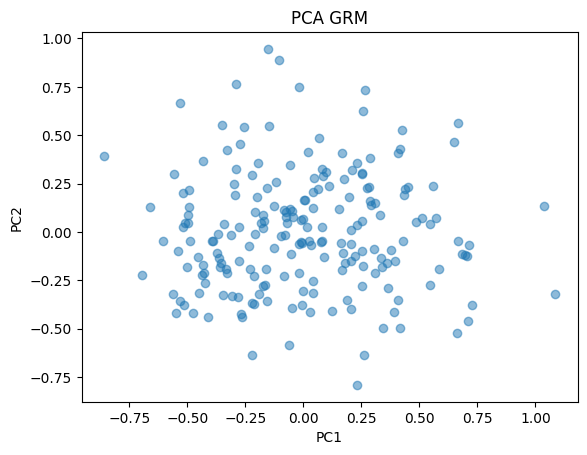

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(grm)

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA GRM")
plt.show()

In [9]:
grm_norm = (grm - np.mean(grm, axis=0)) / np.std(grm, axis=0)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(grm_norm)

umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(grm_norm)

NUM_CLUSTERS = 3
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
clusters_tsne = kmeans.fit_predict(tsne_result)
clusters_umap = kmeans.fit_predict(umap_result)


/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


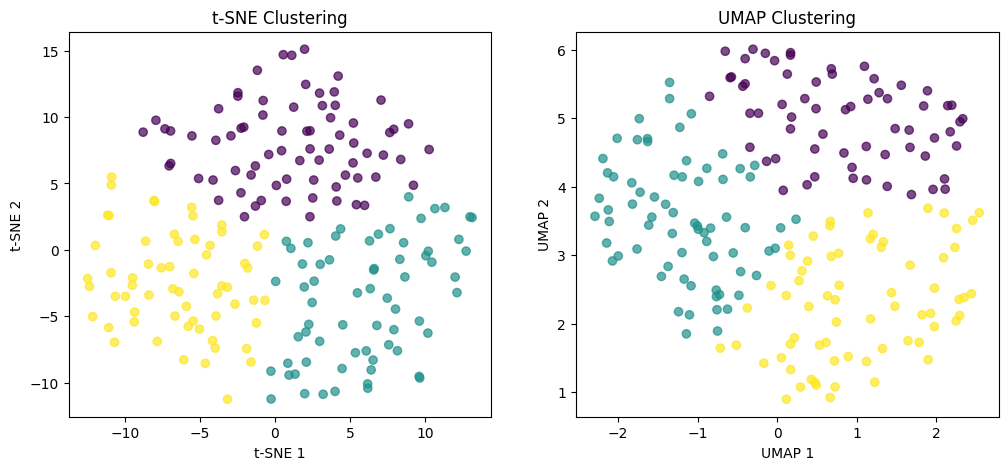

In [10]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap="viridis", alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Clustering")

plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters_umap, cmap="viridis", alpha=0.7)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Clustering")

plt.show()
